# Best model evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import  metrics

## Pre-processing 

In [2]:
df_data=pd.read_csv('final.csv')
df_data['Date_start'] = pd.to_datetime (df_data['Date_start'], format="%Y-%m-%d %H:%M:%S")# create a new column 'data time' of datetime type
df_data = df_data.set_index('Date_start') # make 'datetime' into index
df_data.head()




,Date,Hour,Power_kW,WeekDay,temp_C,solarRad_W/m2,Holiday,Season,rain_day,Power-1,Season_name,hour
Date_start,,,,,,,,,,,,
2017-01-01 00:00:00,01-01-2017,00:00:00,100.810001,0,8.720,1.163,True,1.0,0.0,79.176097,Winter,0
2017-01-01 01:00:00,01-01-2017,01:00:00,99.054135,0,8.210,1.357,True,1.0,0.0,100.810001,Winter,1
2017-01-01 02:00:00,01-01-2017,02:00:00,98.539567,0,7.580,2.604,True,1.0,0.0,99.054135,Winter,2
2017-01-01 03:00:00,01-01-2017,03:00:00,101.435784,0,6.968,1.440,True,1.0,0.0,98.539567,Winter,3
2017-01-01 04:00:00,01-01-2017,04:00:00,98.481664,0,6.797,1.773,True,1.0,0.0,101.435784,Winter,4


In [3]:
#create lists that'll save all of the error and pick the best one
MAE_BTl=[]
MSE_BTl=[]
RMSE_BTl=[]
cvRMSE_BTl=[]

### Split training and test data 

#### One feature only

In [4]:
#sklearn methods do not work with dataframes, it is necessary to create arrays

#X=df_data.values
#X=X[:,1]
#X=X.reshape(-1, 1)  # It is necessary to reshape the vector into column

#### Several features

In [5]:
# recurrent
X=df_data.values
Y=X[:,2]
X=X[:,[3,4,5,6,7,9,11]] 
#feature 2 (month) and feature 5(Energy-2) do not improve significantly
X


array([[0, 8.72, 1.163, ..., 1.0, 79.176097, 0],
       [0, 8.21, 1.357, ..., 1.0, 100.8100005, 1],
       [0, 7.58, 2.604, ..., 1.0, 99.0541345, 2],
       ...,
       [0, 11.33, 311.2, ..., 1.0, 95.9287105, 21],
       [0, 11.22, 126.3, ..., 1.0, 85.652, 22],
       [0, 10.25, 4.431, ..., 1.0, 90.360675, 23]], dtype=object)

### Split Data into training and test data 

In [6]:
#by default, it chooses randomly 75% of the data for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X,Y)
print(X_train)
print(y_train)

[[0 28.21 242.2 ... 3.0 126.2455855 20]
 [3 20.0 935.0 ... 2.0 316.573725 12]
 [0 17.83 133.7 ... 2.0 90.883764 3]
 ...
 [3 24.88 0.221 ... 2.0 348.1834645 18]
 [1 11.46 2.742 ... 4.0 104.879563 3]
 [2 27.15 953.0 ... 3.0 100.8449605 0]]
[115.787083 312.180564 92.6730605 ... 196.5116895 104.8146685 106.1802935]


## Linear Regression 

In [7]:
from sklearn import  linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred_LR = regr.predict(X_test)


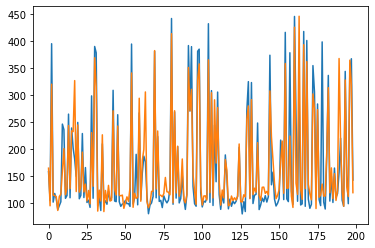

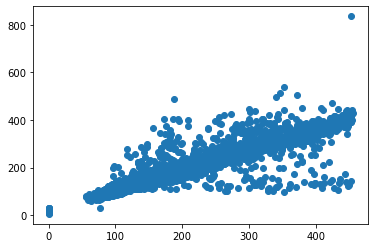

In [8]:
plt.plot(y_test[1:200])
plt.plot(y_pred_LR[1:200])
plt.show()
plt.scatter(y_test,y_pred_LR)

In [9]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
cvRMSE_LR=RMSE_LR/np.mean(y_test)
print(MAE_LR, MSE_LR, RMSE_LR,cvRMSE_LR)
MAE_BTl.append(MAE_LR)
MSE_BTl.append(MSE_LR)
RMSE_BTl.append(RMSE_LR)
cvRMSE_BTl.append(cvRMSE_LR)

23.259281180076144 1726.4632411662394 41.55073093419946 0.2517635229156318


## Support Vector Regressor

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_SVR = sc_X.fit_transform(X_train)
y_train_SVR = sc_y.fit_transform(y_train.reshape(-1,1))

In [11]:
regr = SVR(kernel='rbf')
regr.fit(X_train_SVR,y_train_SVR)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

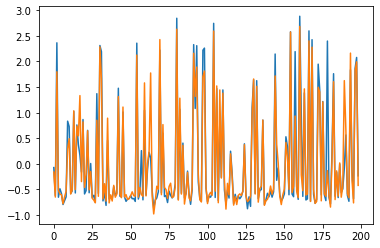

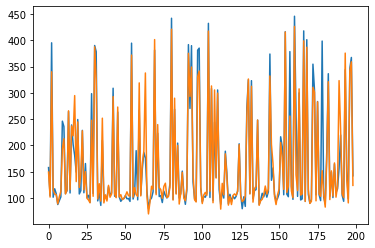

In [12]:
y_pred_SVR = regr.predict(sc_X.fit_transform(X_test))
y_test_SVR=sc_y.fit_transform(y_test.reshape(-1,1))
y_pred_SVR2=sc_y.inverse_transform(y_pred_SVR)
#y_pred_SVR = sc_y.inverse_transform(regr.predict(sc_X.fit_transform(X_test)))
plt.plot(y_test_SVR[1:200])
plt.plot(y_pred_SVR[1:200])
plt.show()
plt.plot(y_test[1:200])
plt.plot(y_pred_SVR2[1:200])

In [13]:
MAE_SVR=metrics.mean_absolute_error(y_test,y_pred_SVR2) 
MSE_SVR=metrics.mean_squared_error(y_test,y_pred_SVR2)  
RMSE_SVR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_SVR2))
cvRMSE_SVR=RMSE_SVR/np.mean(y_test)
print(MAE_SVR, MSE_SVR, RMSE_SVR,cvRMSE_SVR)
MAE_BTl.append(MAE_SVR)
MSE_BTl.append(MSE_SVR)
RMSE_BTl.append(RMSE_SVR)
cvRMSE_BTl.append(cvRMSE_SVR)

14.901060465566157 1181.7046718356817 34.375931577714105 0.20829009365003992


## Decision Tree Regressor 

In [14]:
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor(
#criterion='mse', 
#splitter='best', 
#max_depth=None, 
#min_samples_split=2, 
#min_samples_leaf=1, 
#min_weight_fraction_leaf=0.0, 
#max_features=None, 
#random_state=None, 
#max_leaf_nodes=None, 
#min_impurity_decrease=0.0, 
#min_impurity_split=None, 
#presort='deprecated', 
#ccp_alpha=0.0)

# Create Regression Decision Tree object
DT_regr_model = DecisionTreeRegressor()

# Train the model using the training sets
DT_regr_model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_DT = DT_regr_model.predict(X_test)

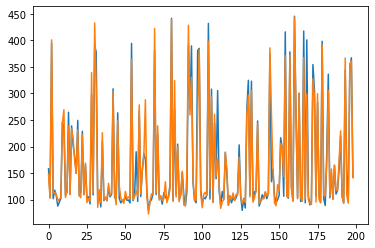

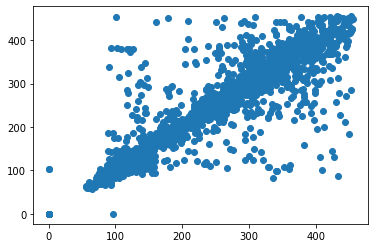

In [15]:
plt.plot(y_test[1:200])
plt.plot(y_pred_DT[1:200])
plt.show()
plt.scatter(y_test,y_pred_DT)

In [16]:
#Evaluate errors
MAE_DT=metrics.mean_absolute_error(y_test,y_pred_DT) 
MSE_DT=metrics.mean_squared_error(y_test,y_pred_DT)  
RMSE_DT= np.sqrt(metrics.mean_squared_error(y_test,y_pred_DT))
cvRMSE_DT=RMSE_DT/np.mean(y_test)
print(MAE_DT, MSE_DT, RMSE_DT,cvRMSE_DT)
MAE_BTl.append(MAE_DT)
MSE_BTl.append(MSE_DT)
RMSE_BTl.append(RMSE_DT)
cvRMSE_BTl.append(cvRMSE_DT)

15.801634209825634 1309.7331604338972 36.19023570569688 0.21928329614326864


## Random forest 

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 200, 
              'min_samples_split': 15,
              'max_features': 'sqrt',
              'max_depth': 20,
              'max_leaf_nodes': None}
RF_model = RandomForestRegressor(**parameters)
#RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)


In [19]:
#Evaluate errors
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
cvRMSE_RF=RMSE_RF/np.mean(y_test)
print(MAE_RF,MSE_RF,RMSE_RF,cvRMSE_RF)
MAE_BTl.append(MAE_RF)
MSE_BTl.append(MSE_RF)
RMSE_BTl.append(RMSE_RF)
cvRMSE_BTl.append(cvRMSE_RF)

13.190602012002385 759.7838914995978 27.564177685895107 0.16701642364518618


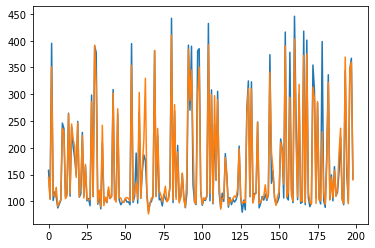

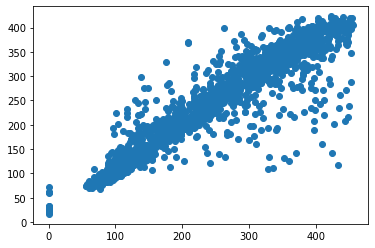

In [20]:
plt.plot(y_test[1:200])
plt.plot(y_pred_RF[1:200])
plt.show()
plt.scatter(y_test,y_pred_RF)

## Uniformized data 

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Random forest uniformized data 

In [22]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 100, 
              'min_samples_split': 15,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(X_train_scaled, y_train.reshape(-1,1))
y_pred_RF = RF_model.predict(X_test_scaled)


<ipython-input-22-047ee3cf3ffa>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(X_train_scaled, y_train.reshape(-1,1))


In [23]:
#Evaluate errors
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
cvRMSE_RF=RMSE_RF/np.mean(y_test)
print(MAE_RF,MSE_RF,RMSE_RF,cvRMSE_RF)
MAE_BTl.append(MAE_RF)
MSE_BTl.append(MSE_RF)
RMSE_BTl.append(RMSE_RF)
cvRMSE_BTl.append(cvRMSE_RF)

14.99580049558609 891.4228794845137 29.85670577080656 0.18090727307342752


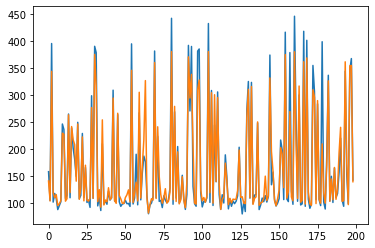

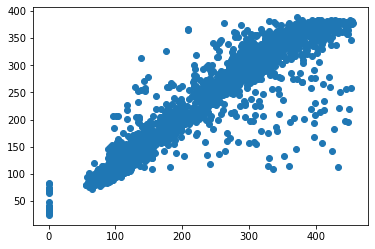

In [24]:
plt.plot(y_test[1:200])
plt.plot(y_pred_RF[1:200])
plt.show()
plt.scatter(y_test,y_pred_RF)

## Gradient Boosting 

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

#params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
#          'learning_rate': 0.01, 'loss': 'ls'}
#GB_model = GradientBoostingRegressor(**params)

GB_model = GradientBoostingRegressor()
GB_model.fit(X_train, y_train)
y_pred_GB =GB_model.predict(X_test)

In [26]:
MAE_GB=metrics.mean_absolute_error(y_test,y_pred_GB) 
MSE_GB=metrics.mean_squared_error(y_test,y_pred_GB)  
RMSE_GB= np.sqrt(metrics.mean_squared_error(y_test,y_pred_GB))
cvRMSE_GB=RMSE_GB/np.mean(y_test)
print(MAE_GB,MSE_GB,RMSE_GB,cvRMSE_GB)
MAE_BTl.append(MAE_GB)
MSE_BTl.append(MSE_GB)
RMSE_BTl.append(RMSE_GB)
cvRMSE_BTl.append(cvRMSE_GB)

14.641050905210113 892.2015222773852 29.869742588067027 0.1809862655476225


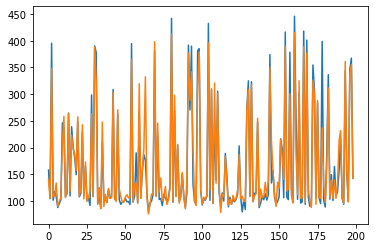

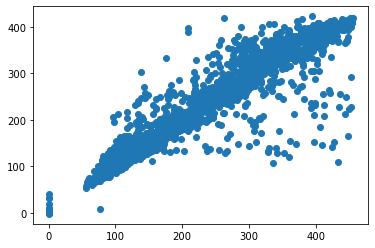

In [27]:
plt.plot(y_test[1:200])
plt.plot(y_pred_GB[1:200])
plt.show()
plt.scatter(y_test,y_pred_GB)

## Bootstrapping 

In [28]:
from sklearn.ensemble import BaggingRegressor

BT_model = BaggingRegressor()
BT_model.fit(X_train, y_train)
y_pred_BT =BT_model.predict(X_test)


In [29]:
MAE_BT=metrics.mean_absolute_error(y_test,y_pred_BT) 
MSE_BT=metrics.mean_squared_error(y_test,y_pred_BT)  
RMSE_BT= np.sqrt(metrics.mean_squared_error(y_test,y_pred_BT))
cvRMSE_BT=RMSE_BT/np.mean(y_test)
print(MAE_BT,MSE_BT,RMSE_BT,cvRMSE_BT)
MAE_BTl.append(MAE_BT)
MSE_BTl.append(MSE_BT)
RMSE_BTl.append(RMSE_BT)
cvRMSE_BTl.append(cvRMSE_BT)

12.8620602809967 749.4218888858967 27.375571023923804 0.16587362118189258


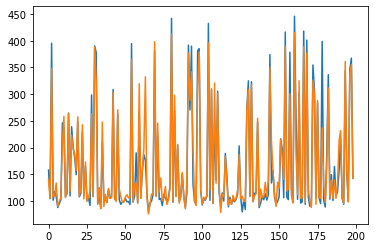

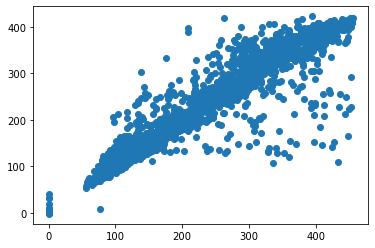

In [30]:
plt.plot(y_test[1:200])
plt.plot(y_pred_GB[1:200])
plt.show()
plt.scatter(y_test,y_pred_GB)

## Neural Networks 

In [31]:
from sklearn.neural_network import MLPRegressor

NN_model = MLPRegressor(hidden_layer_sizes=(10,10,10,10))
NN_model.fit(X_train,y_train)
y_pred_NN = NN_model.predict(X_test)


D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
MAE_NN=metrics.mean_absolute_error(y_test,y_pred_NN) 
MSE_NN=metrics.mean_squared_error(y_test,y_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_NN))
cvRMSE_NN=RMSE_NN/np.mean(y_test)
print(MAE_NN,MSE_NN,RMSE_NN,cvRMSE_NN)
MAE_BTl.append(MAE_NN)
MSE_BTl.append(MSE_NN)
RMSE_BTl.append(RMSE_NN)
cvRMSE_BTl.append(cvRMSE_NN)

20.228778020717748 1433.874552333913 37.866536048784724 0.22944030831493933


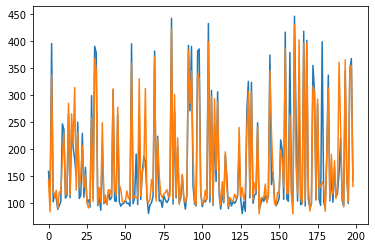

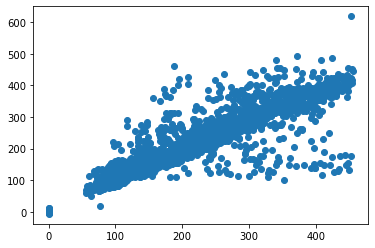

In [33]:
plt.plot(y_test[1:200])
plt.plot(y_pred_NN[1:200])
plt.show()
plt.scatter(y_test,y_pred_NN)

# Best model evaluation

In [34]:
best=min(MAE_BTl)
best_index=MAE_BTl.index(best) +1
print("The lowest error is ", str(best)," hence the best method is the number " , str(best_index))

The lowest error is  12.8620602809967  hence the best method is the number  7


which, in our case, is bootstrapping